In [59]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adadelta

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import argparse
import sys
import copy
import os
import glob
import scipy as sp
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import pickle
import time
from sklearn.preprocessing import StandardScaler

In [4]:
#Setting up the dataset for ML
# Text file data converted to integer data type
x_data = np.loadtxt("dataset/x_dataTrain.txt", dtype=float)
print(x_data)

[[3.27030e-24 3.07616e-24 5.22539e-24 ... 1.32958e-21 1.33228e-21
  1.35562e-21]
 [1.30267e-20 1.30677e-20 1.31157e-20 ... 3.81686e-20 3.81212e-20
  3.80739e-20]
 [6.26322e-21 6.28294e-21 6.30602e-21 ... 1.83835e-20 1.83606e-20
  1.83378e-20]
 ...
 [2.18046e-21 2.18672e-21 2.19415e-21 ... 4.09628e-21 4.09113e-21
  4.08599e-21]
 [8.45625e-21 8.48075e-21 8.50976e-21 ... 1.65705e-20 1.65496e-20
  1.65289e-20]
 [9.18122e-27 9.43401e-27 1.16085e-26 ... 4.02891e-22 4.05835e-22
  4.14389e-22]]


In [5]:
#Setting up the dataset for ML
# Text file data converted to integer data type
y_data = np.loadtxt("dataset/y_dataTrain.txt", dtype=float)
print(y_data)

[[5.44779525e-02 3.63563344e-01 3.93226327e-01 ... 3.84039400e-03
  1.04632279e-03 8.05759487e-06]
 [4.16023007e-02 1.98831946e-01 3.19697149e-01 ... 1.58676888e-04
  2.70865681e-04 6.98852685e-06]
 [3.25809662e-02 3.30184164e-01 2.25277622e-01 ... 3.64259914e-04
  1.77938880e-05 5.15590766e-06]
 ...
 [6.00137545e-03 2.25446819e-01 2.36290974e-01 ... 3.41272939e-03
  1.68012889e-04 8.55777941e-06]
 [9.61424398e-03 2.41019755e-01 4.74460251e-01 ... 2.28148605e-03
  1.53862644e-04 3.59720563e-06]
 [1.48247666e-02 4.65782909e-01 3.00848722e-01 ... 5.70894991e-03
  1.74632155e-04 1.76412088e-06]]


In [6]:
feature_dict = {
    0 : 'H2O',
    1 : 'CO2',
    2 : 'O2',
    3 : 'N2',
    4 : 'CH4',
    5 : 'N2O',
    6 : 'CO',
    7 : 'O3',
    8 : 'SO2',
    9 : 'NH3',
    10 : 'C2H6',
    11 : 'NO2'
}

,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,3.184520e-21,4.128950e-21,2.972870e-21,3.593550e-21,3.992460e-21,4.300100e-21,3.117050e-21,3.945000e-21,4.144260e-21,4.050100e-21,...,4.880210e-21,5.003070e-21,4.906370e-21,5.019940e-21,4.781300e-21,5.192190e-21,5.112040e-21,5.172430e-21,5.186400e-21,4.990370e-21
1,2.227300e-19,2.228550e-19,2.229800e-19,2.231010e-19,2.232220e-19,2.233430e-19,2.234650e-19,2.235850e-19,2.237020e-19,2.238170e-19,...,2.198600e-19,2.197590e-19,2.196570e-19,2.195550e-19,2.194530e-19,2.193510e-19,2.192490e-19,2.191460e-19,2.190440e-19,2.189410e-19
2,1.072880e-19,1.073560e-19,1.074230e-19,1.074840e-19,1.075440e-19,1.076060e-19,1.076680e-19,1.077290e-19,1.077850e-19,1.078370e-19,...,1.058990e-19,1.058500e-19,1.058010e-19,1.057520e-19,1.057020e-19,1.056530e-19,1.056030e-19,1.055530e-19,1.055040e-19,1.054540e-19
3,1.799890e-19,2.333510e-19,1.679460e-19,2.030020e-19,2.255040e-19,2.428550e-19,1.759600e-19,2.227130e-19,2.339370e-19,2.286050e-19,...,2.544210e-19,2.608220e-19,2.557610e-19,2.616740e-19,2.492150e-19,2.706350e-19,2.664400e-19,2.695790e-19,2.702990e-19,2.600690e-19
4,1.061550e-20,1.376260e-20,9.906640e-21,1.197420e-20,1.330190e-20,1.432560e-20,1.038120e-20,1.313860e-20,1.380110e-20,1.348680e-20,...,1.530580e-20,1.569150e-20,1.538700e-20,1.574330e-20,1.499390e-20,1.628370e-20,1.603160e-20,1.622110e-20,1.626510e-20,1.565000e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.737130e-21,2.032500e-21,1.182910e-21,1.859630e-21,2.298270e-21,2.446110e-21,1.430390e-21,2.213150e-21,2.585190e-21,2.294630e-21,...,4.346680e-21,4.403220e-21,4.352960e-21,4.412650e-21,4.239090e-21,4.617100e-21,4.492400e-21,4.574900e-21,4.550510e-21,4.400570e-21
9999,5.580060e-20,7.233860e-20,5.208640e-20,6.295080e-20,6.993170e-20,7.531090e-20,5.459420e-20,6.908080e-20,7.256160e-20,7.090380e-20,...,7.863370e-20,8.059530e-20,7.903540e-20,8.085340e-20,7.699660e-20,8.359010e-20,8.228830e-20,8.324210e-20,8.344720e-20,8.027840e-20
10000,2.805360e-20,2.806570e-20,2.807770e-20,2.808940e-20,2.810110e-20,2.811280e-20,2.812450e-20,2.813620e-20,2.814750e-20,2.815880e-20,...,2.531160e-20,2.529830e-20,2.528500e-20,2.527160e-20,2.525810e-20,2.524460e-20,2.523110e-20,2.521760e-20,2.520410e-20,2.519060e-20
10001,1.117950e-19,1.118460e-19,1.118950e-19,1.119430e-19,1.119910e-19,1.120390e-19,1.120870e-19,1.121340e-19,1.121810e-19,1.122260e-19,...,1.016890e-19,1.016360e-19,1.015830e-19,1.015300e-19,1.014770e-19,1.014230e-19,1.013700e-19,1.013170e-19,1.012640e-19,1.012100e-19


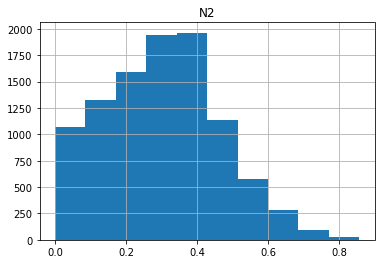

In [93]:
features = pd.DataFrame(x_data)
labels = pd.DataFrame(y_data)
labels.rename(columns=feature_dict,
          inplace=True)
labelsSum = labels[['H2O','CO2', 'O2', 'N2', 'CH4']]
labelsSum.hist(column='N2')
features_sel = features.iloc[:, 1500:2500]
features_sel

In [94]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_sel, labelsSum, test_size=0.33, random_state=42)

In [95]:
scaler = StandardScaler()
X_scaledTrain = scaler.fit_transform(X_train)
X_scaledTest = scaler.fit_transform(X_test)

In [96]:
y_scaler = StandardScaler()
y_scaledTrain = scaler.fit_transform(y_train)
y_scaledTest = scaler.fit_transform(y_test)

In [97]:
X_scaledTrain = np.squeeze(X_scaledTrain)

In [98]:
X_scaledTest = np.squeeze(X_scaledTest)

In [ ]:
#Making CNN Model

In [14]:
X_scaledTrain = np.expand_dims(X_scaledTrain,2)
X_scaledTest = np.expand_dims(X_scaledTest,2)

In [100]:
units = 1024
batch_size = 256
epochs = 64
dropout = 0.2

Ntr = 2000
tau = 0.01
lengthscale = .01
reg = lengthscale**2 * (1 - dropout) / (2. * Ntr * tau )

In [101]:
def network():
    model = Sequential()
    model.add(Dense(units, activation='relu'))
    model.add(Lambda(lambda x: K.dropout(x,level=dropout)))
    model.add(Dense(units, activation='relu'))
    model.add(Lambda(lambda x: K.dropout(x,level=dropout)))
    model.add(Dense(units, activation='relu',kernel_regularizer=l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=dropout)))
    model.add(Dense(units, activation='relu',kernel_regularizer=l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=dropout)))
    model.add(Dense(units, activation='relu',kernel_regularizer=l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=dropout)))
    model.add(Dense(y_scaledTrain.shape[-1], activation='linear',kernel_regularizer=l2(reg)))
    return model

In [102]:
network()

In [103]:
cnn = network()
cnn.compile(loss='mean_squared_error',
                          optimizer='SGD',
           metrics=['accuracy'])

In [104]:
history_std =cnn.fit(X_scaledTrain, y_scaledTrain,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/64
21/21 [==============================] - 3s 101ms/step - loss: 1.0795 - accuracy: 0.2104 - val_loss: 1.0455 - val_accuracy: 0.2140
Epoch 2/64
21/21 [==============================] - 2s 91ms/step - loss: 1.0507 - accuracy: 0.2057 - val_loss: 1.0424 - val_accuracy: 0.2125
Epoch 3/64
21/21 [==============================] - 2s 92ms/step - loss: 1.0447 - accuracy: 0.2076 - val_loss: 1.0290 - val_accuracy: 0.2036
Epoch 4/64
21/21 [==============================] - 2s 89ms/step - loss: 1.0329 - accuracy: 0.2108 - val_loss: 1.0330 - val_accuracy: 0.2073
Epoch 5/64
21/21 [==============================] - 2s 90ms/step - loss: 1.0296 - accuracy: 0.2035 - val_loss: 1.0210 - val_accuracy: 0.2081
Epoch 6/64
21/21 [==============================] - 2s 98ms/step - loss: 1.0293 - accuracy: 0.2031 - val_loss: 1.0253 - val_accuracy: 0.1864
Epoch 7/64
21/21 [==============================] - 2s 96ms/step - loss: 1.0257 - accuracy: 0.2043 - val_loss: 1.0191 - val_accuracy: 0.2125
Epoch 8/64
2

KeyboardInterrupt: 

In [83]:
cnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1024)              4484096   
_________________________________________________________________
lambda_34 (Lambda)           (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
lambda_35 (Lambda)           (None, 1024)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
lambda_36 (Lambda)           (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1024)            

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


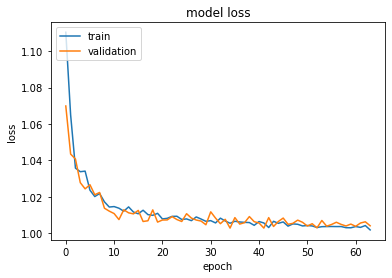

In [84]:
print(history_std.history.keys())
# "Loss"
plt.plot(history_std.history['loss'])
plt.plot(history_std.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
cnn.evaluate(X_scaledTest, y_scaledTest, verbose=0)

[1.0058834552764893, 0.21599514782428741]